# GROUP 10

## R SHREJA - COE18B043
## RITHIC KUMAR N - COE18B044
## SREEDHAR ARUMUGAM - COE18B051

# 1. Consider the 128- dimensional feature vectors (d=128) given in the “gender_feature_vectors.csv” file. (2 classes, male and female)

a) Use PCA to reduce the dimension from d to d’. (Here d=128)

b) Display the eigenvalue based on increasing order, select the d’ of the corresponding
eigenvector which is the appropriate dimension d’ ( select d’ S.T first 95% of λ values
of the covariance matrix are considered).

c) Use d’ features to classify the test cases (any classification algorithm taught in class
like Bayes classifier, minimum distance classifier, and so on)

## Dataset Specifications:

- Total number of samples = 800
- Number of classes = 2 (labeled as “male” and “female”)
- Samples from “1 to 400” belongs to class “male”
- Samples from “401 to 800” belongs to class “female”
- Number of samples per class = 400
- Number of dimensions = 128
- Use the following information to design classifier:
- Number of test cases ( first 10 in each class) = 20
- Number of training feature vectors ( remaining 390 in each class) = 390
- Number of reduced dimensions = d’ (map 128 to d’ features vector)

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('gender_feature_vectors.csv')

In [3]:
df

,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,797,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,798,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,799,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [4]:
df['Unnamed: 1'].value_counts()

female    401
male      399
Name: Unnamed: 1, dtype: int64

In [5]:
df.drop(columns=df.columns[0],inplace=True)
df

,Unnamed: 1,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [6]:
df.rename(columns={df.columns[0]:"Class"},inplace=True)
df

,Class,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [7]:
df_test=df.iloc[np.r_[390:400, 790:800]]

In [8]:
df_test

,Class,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
390,male,-0.080683,0.097440,0.006550,0.018112,-0.114999,0.160041,-0.002373,-0.057956,0.076157,...,0.089160,0.073848,0.030187,-0.071334,-0.175275,-0.100638,0.055430,-0.045177,-0.017163,0.027779
391,male,-0.010301,0.135185,0.049710,-0.046424,-0.041742,0.016607,-0.041778,-0.048020,0.234796,...,0.090084,0.091338,0.022718,0.057871,-0.064987,-0.127295,-0.063550,0.010827,0.007755,0.011586
392,male,-0.112450,0.080098,0.030571,0.000952,-0.097450,-0.045070,-0.003641,-0.142828,0.145999,...,0.054003,0.013400,0.050133,-0.039018,-0.134093,-0.034270,0.083867,0.007422,0.001248,0.076941
393,male,-0.087855,0.100264,0.069775,0.037204,-0.047182,-0.047233,-0.013604,-0.189378,0.125076,...,0.108849,0.140784,-0.039212,0.041003,-0.127442,-0.022349,0.104111,0.024425,0.039480,-0.030288
394,male,-0.139066,0.141988,0.070456,-0.003518,-0.065637,-0.037767,-0.094195,-0.195665,0.070896,...,0.125822,0.039625,0.067861,0.134050,-0.178726,-0.100577,0.015707,-0.005463,0.001857,0.079183
395,male,-0.129449,0.132177,0.055916,-0.009390,-0.080541,-0.072362,-0.067433,-0.192243,0.108654,...,0.142675,0.028204,-0.010465,0.002703,-0.117138,-0.148947,0.054327,0.004200,0.046730,0.037774
396,male,-0.158460,0.109948,0.019088,0.015506,-0.069668,0.032311,0.015062,-0.140817,0.141132,...,0.143453,0.059608,-0.006824,0.056758,-0.064352,-0.108518,0.132037,0.050347,0.071465,-0.022954
397,male,-0.101499,0.119739,0.016951,-0.013677,-0.055524,0.028399,0.028164,-0.152100,0.109814,...,0.046488,0.051044,-0.008298,0.018010,-0.164197,-0.122292,0.032616,-0.030194,-0.018642,0.032821
398,male,-0.149516,0.081588,0.090796,-0.053116,-0.133314,0.001096,0.019941,-0.117803,0.102320,...,0.111678,-0.016921,0.059115,-0.007810,-0.096824,-0.079415,-0.015487,-0.075470,0.062481,0.052727
399,female,0.039844,0.070357,0.130196,-0.007683,-0.077825,-0.021298,-0.024133,-0.085105,0.071288,...,0.105510,0.081928,-0.033337,-0.023604,-0.167003,-0.059075,0.053074,0.080940,0.011467,-0.021999


In [9]:
df_train=df.iloc[np.r_[0:390,400:790]]

In [10]:
df_train

,Class,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,female,-0.017931,0.045591,0.059826,-0.059833,-0.126832,0.070365,0.026347,-0.093537,0.278268,...,-0.007122,0.054781,0.042244,-0.074819,-0.143953,-0.088869,0.005722,-0.023399,-0.065643,0.070971
786,female,-0.039572,0.049409,0.100950,-0.092940,-0.152356,-0.057714,-0.000538,-0.115991,0.206082,...,0.004484,0.114056,-0.050633,-0.022527,-0.123464,-0.087283,0.087269,-0.020627,-0.023931,0.079812
787,female,-0.015170,-0.001116,0.132143,-0.078673,-0.134462,-0.155683,-0.030665,-0.164758,0.105174,...,-0.020632,0.083426,-0.001711,-0.094793,-0.059944,-0.038360,-0.003003,-0.004797,-0.030830,0.047556
788,female,-0.151263,0.096725,0.075206,-0.047269,-0.233372,-0.019918,-0.072370,-0.118408,0.193336,...,0.015628,0.055113,-0.030315,-0.020312,-0.073715,-0.009520,-0.020806,-0.062609,-0.123534,-0.001360


## Covariance

In [11]:
df_dim=df_train[[i for i in df.columns[1:]]]

In [12]:
df_dim.shape

(780, 128)

In [13]:
cov=np.cov(df_dim.T)
cov

array([[ 2.95108480e-03, -3.70158184e-04, -2.16257469e-04, ...,
         4.34218359e-04, -1.10121464e-04, -2.23638279e-05],
       [-3.70158184e-04,  2.50417089e-03,  6.23082137e-05, ...,
        -3.84633702e-04, -1.45010282e-04, -2.40364718e-05],
       [-2.16257469e-04,  6.23082137e-05,  2.60834145e-03, ...,
        -3.21716028e-04, -2.00431637e-04,  1.91564799e-05],
       ...,
       [ 4.34218359e-04, -3.84633702e-04, -3.21716028e-04, ...,
         2.36909122e-03,  1.84584670e-06,  1.79111827e-04],
       [-1.10121464e-04, -1.45010282e-04, -2.00431637e-04, ...,
         1.84584670e-06,  2.49192480e-03,  5.51925391e-05],
       [-2.23638279e-05, -2.40364718e-05,  1.91564799e-05, ...,
         1.79111827e-04,  5.51925391e-05,  2.26553560e-03]])

In [14]:
cov.shape

(128, 128)

## getting eigen values 

In [15]:


def sorted_eig(A):  # For now we sort 'by convention'. For PCA the sorting is key. 
    lambdas, vs = np.linalg.eig(A)
    # Next line just sorts values & vectors together in order of decreasing eigenvalues
    lambdas, vs = zip(*sorted(zip(list(lambdas), list(vs.T)),key=lambda x: x[0], reverse=True))
    return lambdas, np.array(vs).T  # un-doing the list-casting from the previous line


In [16]:
lambdas,vs=sorted_eig(cov)
print("Lambda values in sorted order")
lambdas

Lambda values in sorted order


(0.04137574503460549,
 0.02360849711562386,
 0.017077038743770187,
 0.014451291776124938,
 0.012633313809123732,
 0.011714705691204017,
 0.010189552276534721,
 0.009087057091511646,
 0.008482770886136562,
 0.008039865359807597,
 0.00760030905912849,
 0.007145776669589233,
 0.006771403338885542,
 0.006509757015262208,
 0.0062636178632257625,
 0.005842316913291985,
 0.005564646916617724,
 0.005510877415737265,
 0.005215948451115262,
 0.005052886212394662,
 0.004814955569113215,
 0.004563226306426189,
 0.0044474704013512225,
 0.004268294677809414,
 0.004229219580396081,
 0.003926267119388022,
 0.0038579422169492264,
 0.003691394876422616,
 0.003477780068960983,
 0.0033675627685272884,
 0.003202721657676988,
 0.0030656341277170433,
 0.0030408421988791347,
 0.0028325439794659106,
 0.0027758324222281914,
 0.002700415370836653,
 0.0026746600113390874,
 0.0025363760389129028,
 0.002515055042077224,
 0.0024227300289765487,
 0.002357721538014705,
 0.002321156393347481,
 0.0022633127203457093,
 0

In [17]:
vs

array([[-0.07127427, -0.06435239, -0.05941313, ...,  0.01756089,
        -0.06551164,  0.03609231],
       [-0.03849229,  0.00910902,  0.02515185, ...,  0.06466022,
        -0.1574927 ,  0.01232222],
       [ 0.09235571,  0.03575751, -0.11693621, ..., -0.03149788,
         0.0080926 ,  0.07226275],
       ...,
       [-0.01535881, -0.00290511,  0.04327725, ...,  0.10022143,
        -0.01055383, -0.12365049],
       [-0.04780239,  0.02650115, -0.08556776, ..., -0.02240944,
        -0.04477904, -0.18795663],
       [-0.03681228, -0.07247092, -0.07462774, ..., -0.02856651,
        -0.08375543, -0.028343  ]])

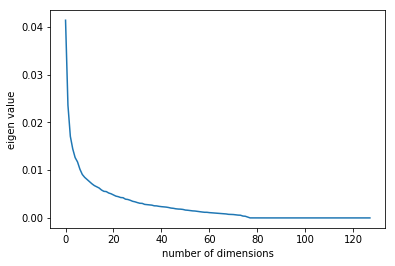

In [18]:
plt.plot(lambdas)
plt.xlabel('number of dimensions')
plt.ylabel('eigen value');

## Getting no of components 

In [19]:
#consider values which explain 95% of variance

print("Total lambda values:",len(lambdas))

total_eigen=np.sum(lambdas)
r_sum=0

for i in range(len(lambdas)):
    if(r_sum/total_eigen >=.95):
        index=i
        break
    else:
        r_sum+=lambdas[i]

lambda_rd=lambdas[:index]
vs_rd=vs[:index]


Total lambda values: 128


In [20]:
print("Reduced lambda ",len(lambda_rd))

Reduced lambda  57


### Verifying with inbuilt PCA for no of components

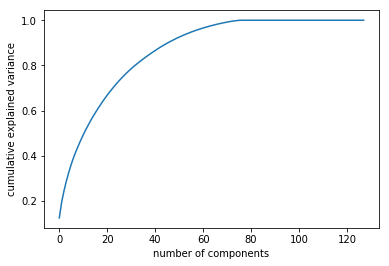

In [21]:

from sklearn.decomposition import PCA

pca = PCA().fit(df_dim)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#we can see for 0.95, we get around 60 

## Reducing the data 

In [22]:
red_train_data=df_dim @ vs_rd.T
red_train_data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,-0.085922,-0.200630,0.193114,0.162222,0.005716,0.034162,0.029775,-0.081066,0.257503,0.153337,...,0.087824,-0.193887,0.018001,-0.048210,-0.269157,0.180492,-0.069221,0.053774,-0.052536,-0.090933
1,-0.055755,-0.124344,0.151680,0.157961,0.018568,0.030559,0.088235,-0.114077,0.228088,0.177741,...,0.019923,-0.201760,0.060198,-0.092593,-0.177209,0.097307,-0.150326,0.132002,-0.089375,0.003471
2,-0.116070,-0.119059,0.114342,0.098051,0.045468,0.087185,0.125157,-0.029765,0.215327,0.173581,...,0.080638,-0.218977,0.049031,-0.051221,-0.060149,0.138226,-0.050034,0.076307,0.000847,-0.099431
3,-0.082357,-0.187135,0.187303,0.177185,0.044054,-0.014291,0.103310,-0.039566,0.262105,0.134704,...,0.070548,-0.129323,-0.047412,-0.047667,-0.259303,0.194047,0.000947,0.064964,0.010481,-0.056181
4,-0.076012,-0.152521,0.146189,0.112002,-0.001292,-0.000156,0.106822,-0.039447,0.137244,0.159192,...,0.006415,-0.131728,0.028017,-0.021572,-0.202855,0.117037,-0.099153,-0.019145,-0.002226,-0.059579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,-0.166122,-0.143068,0.166056,0.105643,-0.020830,0.119008,0.096983,-0.106037,0.281981,0.138494,...,0.048099,-0.073156,-0.010986,-0.021415,-0.190176,0.143142,-0.016656,0.042434,-0.055224,-0.023027
786,-0.018686,-0.175362,0.225020,0.080913,-0.040170,0.181357,0.142460,-0.044167,0.239496,0.190309,...,0.080325,-0.145771,0.034675,-0.034838,-0.136657,0.294901,-0.080088,0.074613,-0.088874,-0.013736
787,-0.078697,-0.162946,0.220727,0.122436,0.027959,0.120039,0.052178,-0.042097,0.203397,0.233884,...,-0.043713,-0.151812,-0.112280,-0.049001,-0.153829,0.219713,-0.030328,0.119905,-0.022988,-0.033826
788,-0.141495,-0.130481,0.247952,0.166986,0.015830,0.134146,0.090760,-0.086861,0.285471,0.156605,...,0.012914,-0.134855,0.087093,-0.016510,-0.173261,0.201170,-0.018943,0.152684,0.014161,-0.011900


In [23]:
red_test_data=df_test[[i for i in df_test.columns[1:]]] @ vs_rd.T
red_test_data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
390,-0.177132,-0.175115,0.269655,0.118365,0.038968,0.085124,0.057599,-0.065892,0.160551,0.179183,...,0.063630,-0.084376,0.032047,-0.049371,-0.236559,0.222416,-0.028884,0.093523,-0.066469,-0.159836
391,-0.103300,-0.160897,0.167615,0.201968,-0.008014,0.092952,0.045541,0.002151,0.239835,0.024266,...,0.070872,-0.096664,0.048832,-0.158595,-0.108597,0.166361,-0.165938,-0.043387,-0.003391,-0.080195
392,-0.153435,-0.173594,0.193888,0.138280,0.034524,0.119990,0.119908,-0.088775,0.172334,0.192292,...,0.047422,-0.122832,0.033291,0.017305,-0.194508,0.279759,-0.024438,0.102495,-0.033261,-0.039756
393,-0.115593,-0.050115,0.164323,0.055682,0.003437,0.064277,0.133570,-0.020624,0.121353,0.145658,...,0.077590,-0.159808,0.061473,0.017886,-0.135064,0.077669,-0.017468,0.098846,0.052745,0.042242
394,-0.055370,-0.026352,0.158553,0.109222,0.025264,-0.003519,0.089221,0.029834,0.130247,0.138857,...,0.092549,-0.209100,0.053144,-0.029979,-0.121254,0.189756,0.000990,0.032301,0.067969,-0.069182
395,-0.075354,-0.085509,0.129584,0.130524,0.118713,0.045890,0.123421,-0.066907,0.160181,0.163888,...,0.099352,-0.171677,0.051690,-0.011760,-0.131186,0.116032,-0.023271,0.028644,0.023840,-0.017199
396,-0.133736,-0.087822,0.116717,0.095699,0.107149,0.091118,0.136185,-0.025547,0.140453,0.155495,...,0.096969,-0.260203,0.045661,-0.030083,-0.227964,0.136165,0.014646,0.120701,0.011965,0.020040
397,-0.009092,-0.165390,0.148819,0.110606,0.056945,0.022829,0.080098,-0.126040,0.181019,0.201572,...,0.046982,-0.170275,0.082477,-0.039953,-0.196937,0.169005,-0.145151,0.088920,-0.032348,-0.072429
398,-0.035924,-0.125528,0.161770,0.197797,-0.043080,0.037714,0.048948,-0.143283,0.150919,0.170011,...,0.064133,-0.137504,0.001607,-0.074428,-0.283438,0.229533,-0.101954,0.043850,0.039405,-0.077854
399,-0.044933,-0.080137,0.083556,0.119618,0.004948,0.084383,0.091632,-0.087539,0.173509,0.115033,...,0.070199,-0.174401,-0.006613,-0.072725,-0.108628,0.098810,0.049508,0.110066,-0.001451,0.008649


## Classification

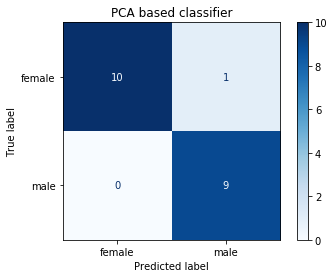

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

classifier = GaussianNB()
classifier.fit(np.array(red_train_data),df_train['Class'])

disp = plot_confusion_matrix(classifier,np.array(red_test_data) , df_test["Class"].to_list(),
                                 display_labels=["female","male"],
                                 cmap=plt.cm.Blues,
                                 )
disp.ax_.set_title("PCA based classifier")
plt.show()

We can see we get good accuracy even after reducing the dimensions (almost half of original dimension)